# Find anagrams - Part 08
# Plot the differences in search spaces and look up comparisons
Mike Babb  
babb.mike@outlook.com

In [1]:
# Standard
from itertools import product
import string

In [2]:
# external
from matplotlib.patches import Rectangle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


In [3]:
import _run_constants as rc
from part_00_file_db_utils import *
from part_00_process_functions import *

# define colors

In [4]:
meo_list = list(range(1, 7))

In [5]:
meo_color_dict = {}
meo_color_hex_dict = {}
for i_meo, meo_value in enumerate(meo_list):
    curr_color = mpl.colormaps["Dark2"].colors[i_meo]
    meo_color_dict[meo_value] = curr_color
    meo_color_hex_dict[meo_value] = mcolors.to_hex(curr_color)
    

my_cmap = mpl.colors.ListedColormap([meo_color_dict[c] for c in meo_list])

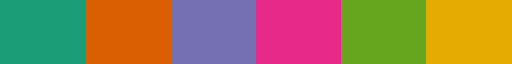

In [6]:
my_cmap

In [7]:
meo_color_dict

{1: (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 2: (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 3: (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 4: (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 5: (0.4, 0.6509803921568628, 0.11764705882352941),
 6: (0.9019607843137255, 0.6705882352941176, 0.00784313725490196)}

In [8]:
meo_color_hex_dict

{1: '#1b9e77',
 2: '#d95f02',
 3: '#7570b3',
 4: '#e7298a',
 5: '#66a61e',
 6: '#e6ab02'}

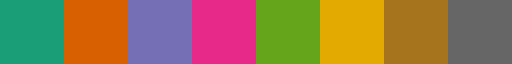

In [9]:
mpl.colormaps["Dark2"]

In [10]:
mcolors.to_hex('darkgreen')

'#006400'

# LOAD DATA

In [11]:
word_df, \
wg_df, \
letter_dict, \
char_matrix, \
word_group_id_list, \
word_id_list, \
wchar_matrix = load_input_data()

...loading words into a dataframe...
...query execution took: 1.26 seconds...
...loading word groups into a dataframe...
...query execution took: 1.28 seconds...
...loading the letter dictionary...
...loading the char matrix...
...subsetting the char matrix...


In [12]:
sql = 'select * from word_group_lookup_counts;'
wg_lu_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)

...query execution took: 1.88 seconds...


In [13]:
sql = 'select * from letter_count;'
lc_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)
lc_df = lc_df.sort_values(by = 'total_letter_rank')

...query execution took: 0.01 seconds...


In [14]:
lc_df.tail()

,letter,total_letter_count,single_letter_count,sl_tl_ratio,first_letter_word_count,total_letter_percent,single_letter_percent,first_letter_word_percent,total_letter_rank,single_letter_rank,first_letter_rank
22,w,13803,13158,0.953271,3910,0.006140,0.056142,0.016683,22,22,19
25,z,8428,8012,0.950641,942,0.003749,0.034185,0.004019,23,23,24
23,x,6898,6870,0.995941,380,0.003068,0.029313,0.001621,24,24,26
16,q,3717,3624,0.974980,1148,0.001653,0.015463,0.004898,25,25,23
9,j,3112,3073,0.987468,1603,0.001384,0.013112,0.006840,26,26,22


In [15]:
letter_rank_dict = {}
for ll, lr in zip(lc_df['letter'], lc_df['total_letter_rank']):
    letter_rank_dict[ll] = lr
 

# MATRIX EXTRACTION OPTION 2

In [16]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651


In [17]:
wg_lu_df.loc[wg_lu_df['n_chars'] >= 8, :].shape

(170056, 13)

In [18]:
df_agg = wg_lu_df[['n_chars', 'me_02_n_char_lookup']].drop_duplicates()

## Matrix Extaction Option #2: Number of words to compare against by word length

88287.875
..\graphics\meo_2_ss.png


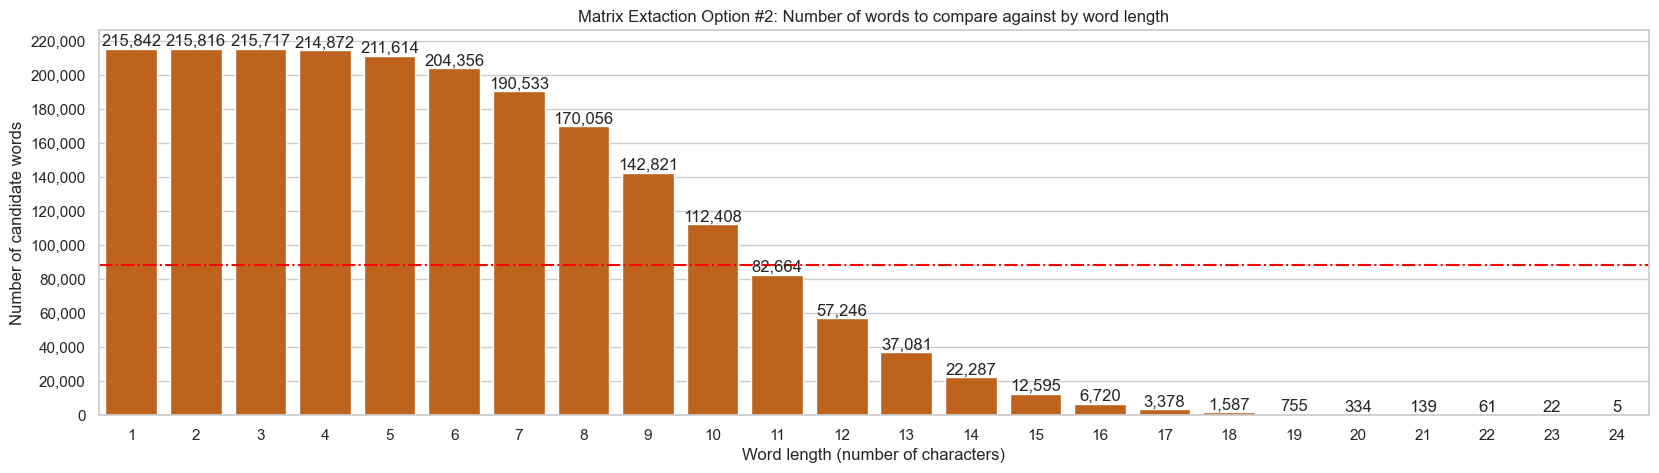

In [19]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="n_chars", y="me_02_n_char_lookup",
                      color=meo_color_dict[2])

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

mean_value = df_agg['me_02_n_char_lookup'].mean()
print(mean_value)
plt.axhline(y=mean_value, color='red', linestyle='dashdot')

# Annotate bars with values
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Matrix Extaction Option #2: Number of words to compare against by word length")
plt.xlabel(xlabel = 'Word length (number of characters)')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\graphics\\meo_2_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

# MATRIX EXTRACTION OPTION 3

## Matrix Extraction Option #3: Number of comparisons to make by first letter

In [20]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651


In [21]:
df_agg = wg_lu_df[['first_letter_id', 'me_03_first_letter_lookup']].drop_duplicates()
df_agg = df_agg.sort_values(by = 'first_letter_id')
df_agg['first_letter'] = list(string.ascii_lowercase)

In [22]:
df_agg.head()

,first_letter_id,me_03_first_letter_lookup,first_letter
0,0,133001,a
16513,1,35319,b
26876,2,80811,c
45684,3,56705,d
56000,4,145106,e


63886.92307692308
..\graphics\meo_3_ss.png


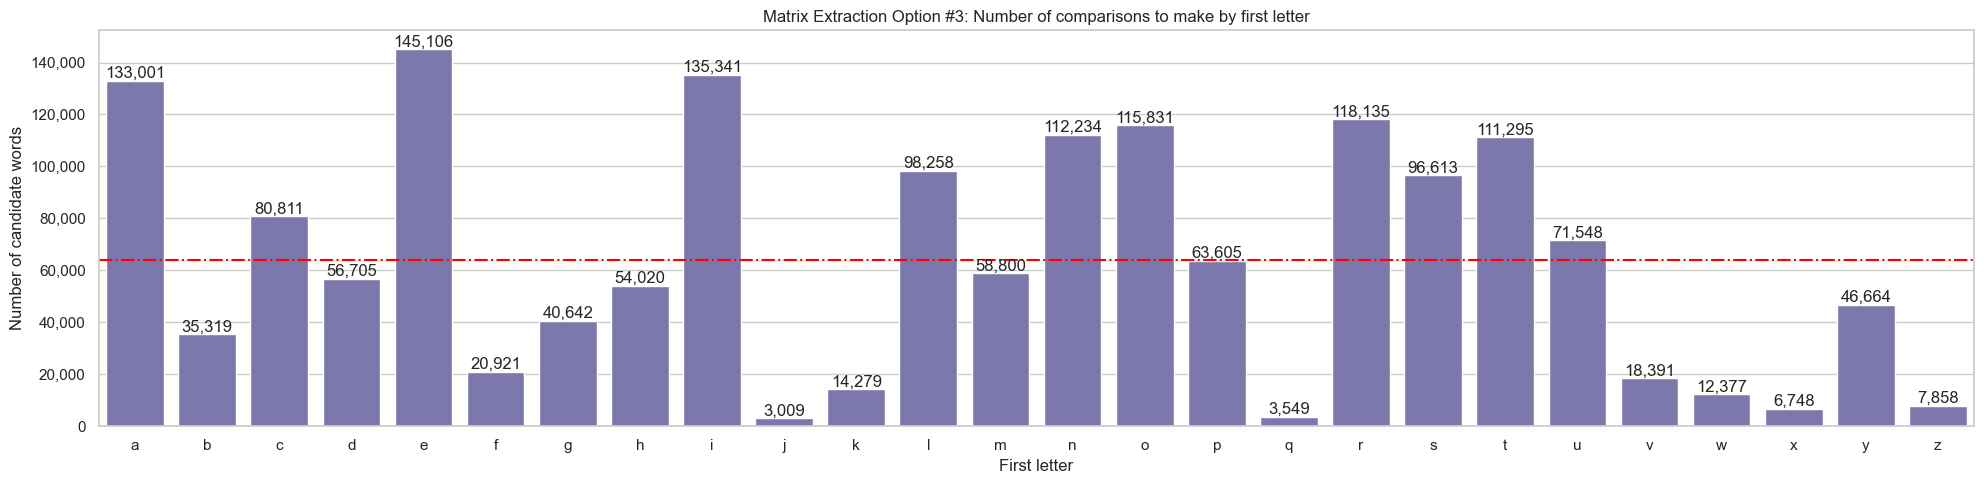

In [23]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(df_agg, x="first_letter", y="me_03_first_letter_lookup",
                      color=meo_color_dict[3])

y_tick_labels = list(range(0, 140001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

#ax.bar_label(ax.containers[0], fontsize=10)
mean_value = df_agg['me_03_first_letter_lookup'].mean()
print(mean_value)
plt.axhline(y=mean_value, color='red', linestyle='dashdot')

# Annotate bars with values
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')

plt.title(label = "Matrix Extraction Option #3: Number of comparisons to make by first letter")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Number of candidate words")
output_file_name = '..\\graphics\\meo_3_ss.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
plt.tight_layout()
plt.show()
my_plot.get_figure().savefig(fname = output_file_name)



## Total Single Letter Count

In [24]:
[letter_rank_dict[ll] for ll in list('achiever')]

[3, 10, 15, 2, 1, 20, 1, 5]

..\graphics\meo_4_letter_rank.png


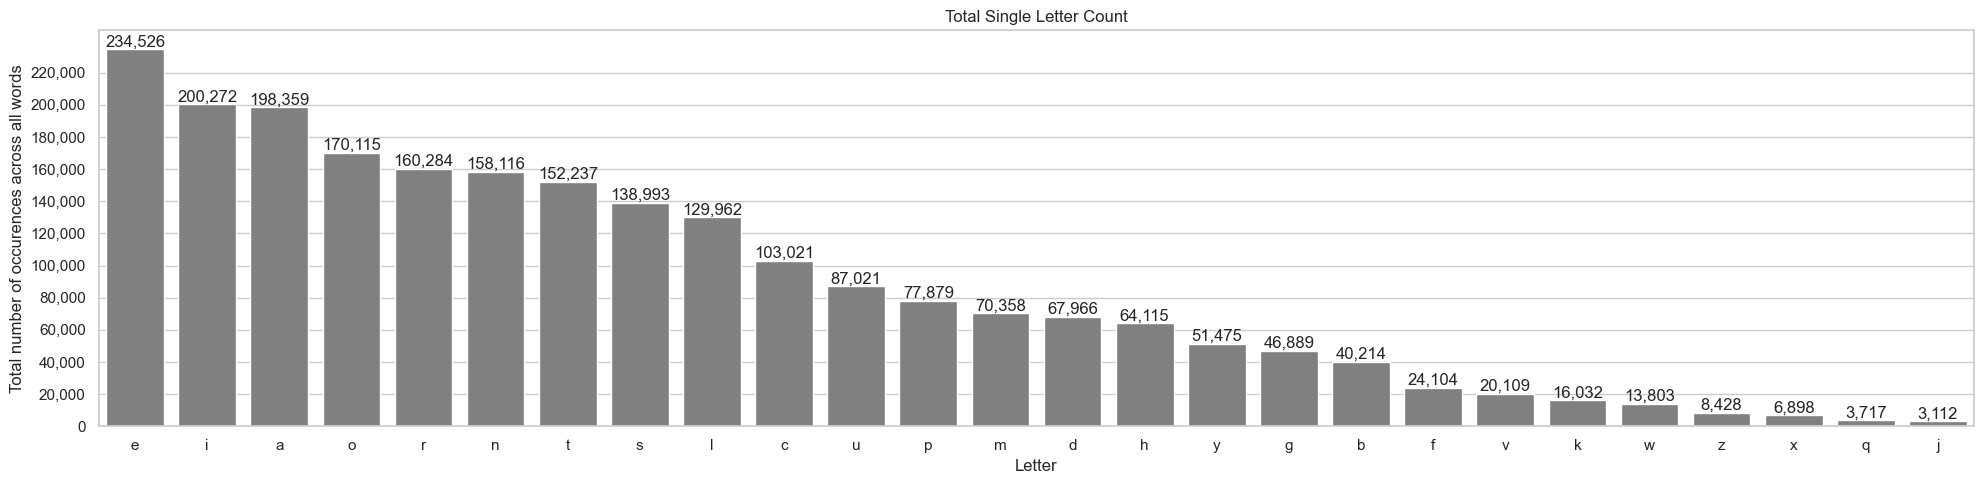

In [25]:
sns.set_theme(style = "whitegrid")

f, ax = plt.subplots(figsize = (20, 5))
my_plot = sns.barplot(lc_df, x="letter", y="total_letter_count",
                      color='Gray')

y_tick_labels = list(range(0, 220001, 20000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

# Annotate bars with values
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')

plt.title(label = "Total Single Letter Count")
plt.xlabel(xlabel = 'Letter')
plt.ylabel(ylabel = "Total number of occurences across all words")
output_file_name = '..\\graphics\\meo_4_letter_rank.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()



## Frequency of starting letter by least common letters

In [26]:
# build a dictionary mapping letter id to letter value
letter_dict = {l_pos:l for l_pos, l in enumerate(string.ascii_lowercase)}

In [27]:
wg_lu_df['first_letter'] = wg_lu_df['first_letter_id'].map(letter_dict)
wg_lu_df['single_letter'] = wg_lu_df['single_letter_id'].map(letter_dict)

In [28]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup,first_letter,single_letter
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001,a,a
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000,a,a
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527,a,l
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731,a,l
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651,a,m


In [29]:
wg_lu_df.shape

(215842, 15)

In [30]:
wg_lu_df_xtb = pd.crosstab(index = wg_lu_df['first_letter'], columns = wg_lu_df['single_letter'],
                           margins=True, margins_name='words')
                           

In [31]:
wg_lu_df_xtb = wg_lu_df_xtb.drop(labels = ['words'], axis = 1)
wg_lu_df_xtb = wg_lu_df_xtb.fillna(0).round(0).astype(int)
wg_lu_df_xtb.head()

single_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
first_letter,,,,,,,,,,,,,,,,,,,,,
a,4,1748,547,1384,0,712,2194,2057,0,120,...,214,20,208,112,516,869,348,517,1650,553
b,0,7049,0,0,0,473,0,0,0,73,...,77,0,0,0,0,276,751,127,0,401
c,0,1548,1544,1362,0,949,1771,2462,0,144,...,157,0,0,0,860,1196,584,320,2559,453
d,0,847,0,3303,0,689,1195,691,0,63,...,60,0,0,0,0,786,443,201,1154,484
e,0,515,201,519,1,244,966,874,0,49,...,263,6,76,27,136,452,158,1628,886,249


In [32]:
wg_lu_df_xtb.tail()

single_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
first_letter,,,,,,,,,,,,,,,,,,,,,
w,0,0,0,0,0,0,0,0,0,10,...,4,0,0,0,0,0,3355,33,0,70
x,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,361,0,0
y,0,21,0,0,0,18,61,0,0,11,...,3,0,0,0,0,17,77,2,212,14
z,0,0,0,0,0,0,0,0,0,2,...,5,0,0,0,0,0,0,17,0,864
words,4,24368,3921,16164,1,16420,25567,19172,2,3009,...,3514,41,993,518,4387,16081,11931,6656,21240,7485


In [33]:
wg_lu_df_xtb.to_excel(excel_writer=os.path.join(rc.DATA_OUTPUT_FILE_PATH, 'number_grid.xlsx'),
                      sheet_name='grid',index=True)

In [34]:
def format_number_for_heatmap(my_n):
    if my_n >= 1000:
        outcome = round(my_n / (1e3), 1)
        outcome = f'{outcome:.1f}K'
    else:
        outcome = f'{my_n:.0f}'
    return outcome

In [35]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup,first_letter,single_letter
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001,a,a
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000,a,a
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527,a,l
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731,a,l
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651,a,m


In [36]:
temp_wg_lu_df = wg_lu_df[['first_letter', 'me_03_first_letter_lookup']].drop_duplicates().sort_values(by = ['first_letter']).set_index(keys = ['first_letter'])

In [37]:
temp_wg_lu_df_pivot = temp_wg_lu_df.transpose()

In [38]:
temp_wg_lu_df_pivot.head()

first_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
me_03_first_letter_lookup,133001,35319,80811,56705,145106,20921,40642,54020,135341,3009,...,3549,118135,96613,111295,71548,18391,12377,6748,46664,7858


In [39]:
wg_lu_df_xtb.shape

(27, 26)

In [40]:
wg_lu_df_xtb = pd.concat([wg_lu_df_xtb, temp_wg_lu_df_pivot])

In [41]:
col_sum = wg_lu_df_xtb.sum(axis = 1).to_list()
col_sum[-1] = 0
#col_sum = wg_lu_df_xtb['words']

['a: 16,513', 'b: 10,363', 'c: 18,808', 'd: 10,316', 'e: 8,297', 'f: 6,551', 'g: 6,249', 'h: 8,651', 'i: 8,378', 'j: 1,566', 'k: 2,098', 'l: 5,411', 'm: 11,420', 'n: 6,126', 'o: 7,230', 'p: 22,698', 'q: 1,129', 'r: 7,558', 's: 22,176', 't: 10,764', 'u: 15,243', 'v: 3,045', 'w: 3,472', 'x: 364', 'y: 528', 'z: 888', 'total words: 215,842', 'search space']
..\graphics\meo_4_first_letter_starting_letter.png


<Figure size 1920x1440 with 0 Axes>

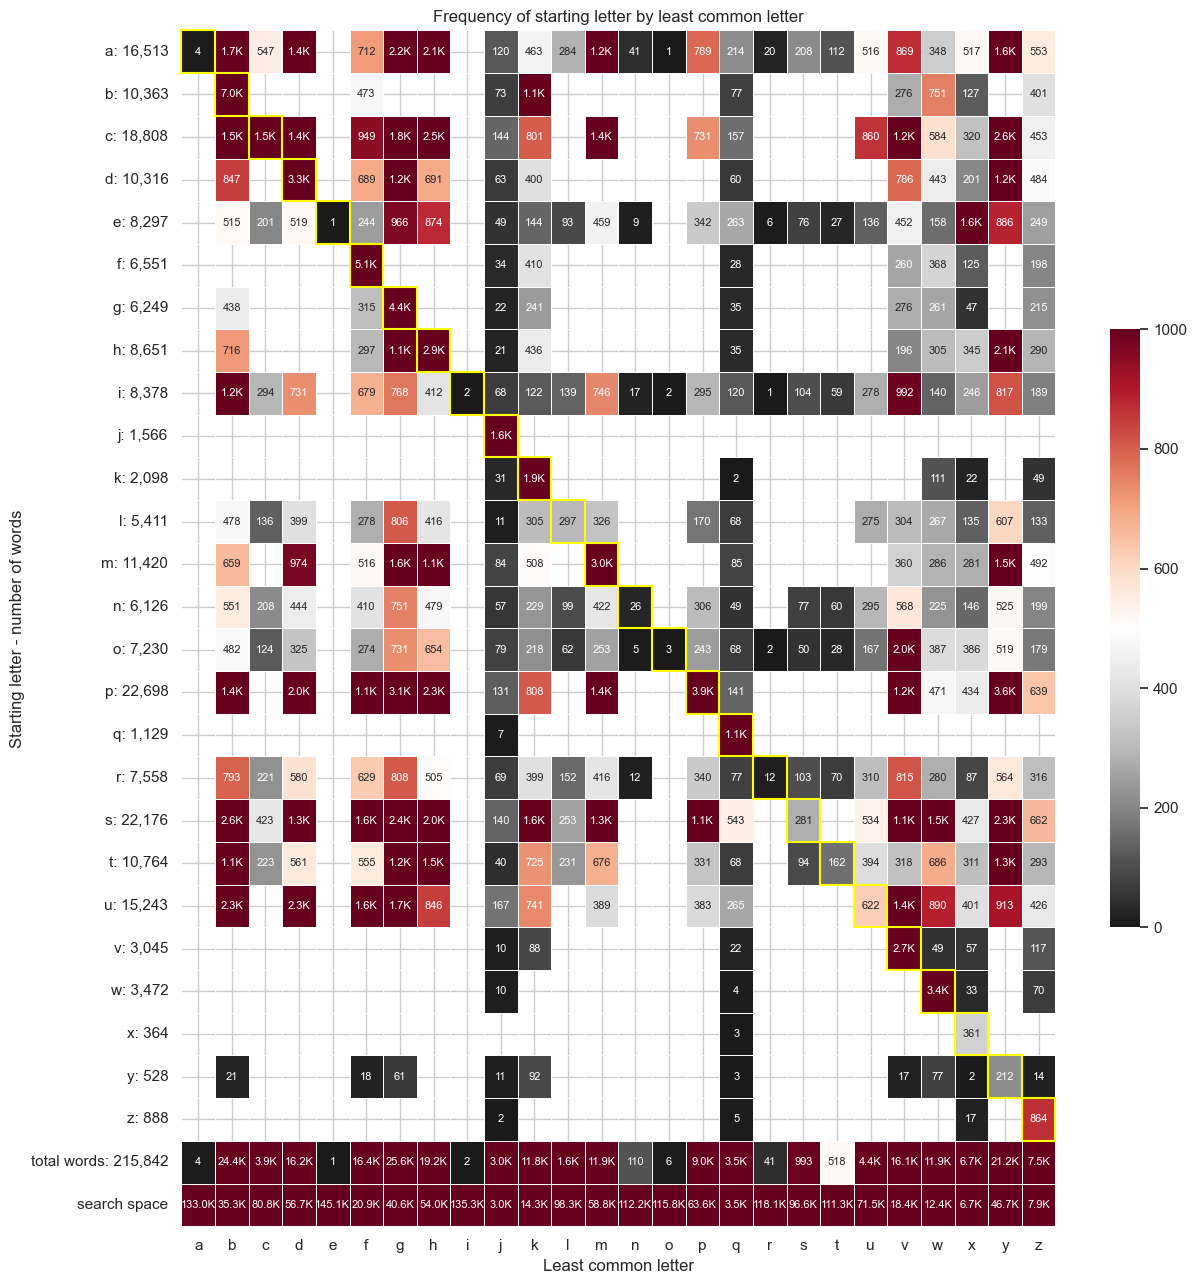

In [42]:
im_data = wg_lu_df_xtb.to_numpy()
im_data_annot = wg_lu_df_xtb.map(func = format_number_for_heatmap).to_numpy()
#im_data = im_data * 100
im_data_mask = im_data == 0
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

norm = plt.Normalize(im_data.min(), 1000)

f, ax = plt.subplots(figsize = (13, 13))
my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = False, linewidths=.5, cbar_kws={'shrink':.5},
            annot=im_data_annot, fmt = '',
            annot_kws={"size": 8},
            mask = im_data_mask,
            xticklabels=wg_lu_df_xtb.columns)            

# now, let's highlight cells greater than 1000
cell_count = 0
for ii in range(0, im_data.shape[1]):
    for jj in range(0, im_data.shape[0]):
        if im_data[jj, ii] >= 1000:                        
            #ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='yellow', lw=1.5, clip_on=False))
            cell_count += 1
        
        #if im_data[jj, ii] >= 5 and im_data[jj, ii] < 10:            
        #    ax.add_patch(Rectangle((ii, jj), 1, 1, fill=False, edgecolor='white', lw=1.5, clip_on=False))

# add shading around the diagonal
for ii in range(0, im_data.shape[1]):
    ax.add_patch(Rectangle((ii, ii), 1, 1, fill=False, edgecolor='yellow', lw=1.5, clip_on=False))

#my_plot.set_yticklabels(labels = wg_lu_df_xtb.columns, rotation=0)
col_labels = wg_lu_df_xtb.columns.tolist()
col_labels.append('total words')
col_labels.append('search space')
y_text = [': '.join([ltr, "{:,}".format(cs)]) for ltr, cs in zip(col_labels, col_sum)]
y_text[-1] = 'search space'
print(y_text)
my_plot.set_yticklabels(labels = y_text, rotation=0)

plt.title(label = "Frequency of starting letter by least common letter")
plt.xlabel(xlabel = 'Least common letter')
plt.ylabel(ylabel = "Starting letter - number of words")
output_file_name = '..\\graphics\\meo_4_first_letter_starting_letter.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

## scatter plot of look ups by search space

In [43]:
wg_lu_df.head()

,word_id,word_group_id,n_chars,first_letter_id,single_letter_id,letter_selector_id,nc_ls_id,me_01_full_matrix_lookup,me_02_n_char_lookup,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup,first_letter,single_letter
0,0,0,1,0,0,0,0,215842,215842,133001,133001,133001,133001,a,a
1,1,1,2,0,0,0,1,215842,215816,133001,133001,133001,133000,a,a
2,2,2,3,0,11,1081,2,215842,215717,133001,98258,65528,65527,a,l
3,3,3,5,0,11,1083,3,215842,211614,133001,98258,42754,42731,a,l
4,4,4,3,0,12,1114,4,215842,215717,133001,58800,38652,38651,a,m


In [44]:
# count words by first letter
col_names = ['first_letter', 'me_03_first_letter_lookup']
me_03_agg_df = wg_lu_df[col_names].groupby(col_names).agg(n_lookups = ('first_letter', 'size')).reset_index()
me_03_agg_df.columns = ['letter', 'word_count', 'first_letter_lookups']

In [45]:
me_03_agg_df.head()

,letter,word_count,first_letter_lookups
0,a,133001,16513
1,b,35319,10363
2,c,80811,18808
3,d,56705,10316
4,e,145106,8297


In [46]:
# count words by first letter
col_names = ['single_letter', 'me_04_single_letter_lookup']
me_04_agg_df = wg_lu_df[col_names].groupby(col_names[:-1]).agg(n_lookups = ('me_04_single_letter_lookup', 'size')).reset_index()
me_04_agg_df.columns = ['letter', 'single_letter_lookup']

In [47]:
me_04_agg_df.head()

,letter,single_letter_lookup
0,a,4
1,b,24368
2,c,3921
3,d,16164
4,e,1


In [48]:
lu_df = pd.merge(left = me_03_agg_df, right = me_04_agg_df)

In [49]:
lu_df.head()

,letter,word_count,first_letter_lookups,single_letter_lookup
0,a,133001,16513,4
1,b,35319,10363,24368
2,c,80811,18808,3921
3,d,56705,10316,16164
4,e,145106,8297,1


In [50]:
lu_df_melt = pd.melt(frame = lu_df, id_vars = ['letter', 'word_count'],
                     var_name='matrix_extraction',value_name='number_of_lookups')

In [51]:
recode_dict = {'first_letter_lookups':3,
               'single_letter_lookup':4}

lu_df_melt['meo'] = lu_df_melt['matrix_extraction'].map(recode_dict)

In [52]:
recode_dict = {'first_letter_lookups':'Option 3: First Letter',
               'single_letter_lookup': 'Option 4: Single Least Common Letter'}
lu_df_melt['matrix_extraction'] = lu_df_melt['matrix_extraction'].map(recode_dict)

In [53]:
meo_color_dict = {}
for i_meo, meo_value in enumerate(meo_list):
    meo_color_dict[meo_value] = mpl.colormaps["Dark2"].colors[i_meo]

my_cmap = mpl.colors.ListedColormap([meo_color_dict[c] for c in meo_list])

In [54]:
lu_df_melt['matrix_extraction'].unique().tolist()

['Option 3: First Letter', 'Option 4: Single Least Common Letter']

In [55]:
lu_df_melt.head()

,letter,word_count,matrix_extraction,number_of_lookups,meo
0,a,133001,Option 3: First Letter,16513,3
1,b,35319,Option 3: First Letter,10363,3
2,c,80811,Option 3: First Letter,18808,3
3,d,56705,Option 3: First Letter,10316,3
4,e,145106,Option 3: First Letter,8297,3


In [56]:
lu_df_melt.head()

,letter,word_count,matrix_extraction,number_of_lookups,meo
0,a,133001,Option 3: First Letter,16513,3
1,b,35319,Option 3: First Letter,10363,3
2,c,80811,Option 3: First Letter,18808,3
3,d,56705,Option 3: First Letter,10316,3
4,e,145106,Option 3: First Letter,8297,3


In [57]:
lu_df_melt['matrix_extraction'].unique()

array(['Option 3: First Letter', 'Option 4: Single Least Common Letter'],
      dtype=object)

..\graphics\meo_4_search_space_letter_lookup_diff.png


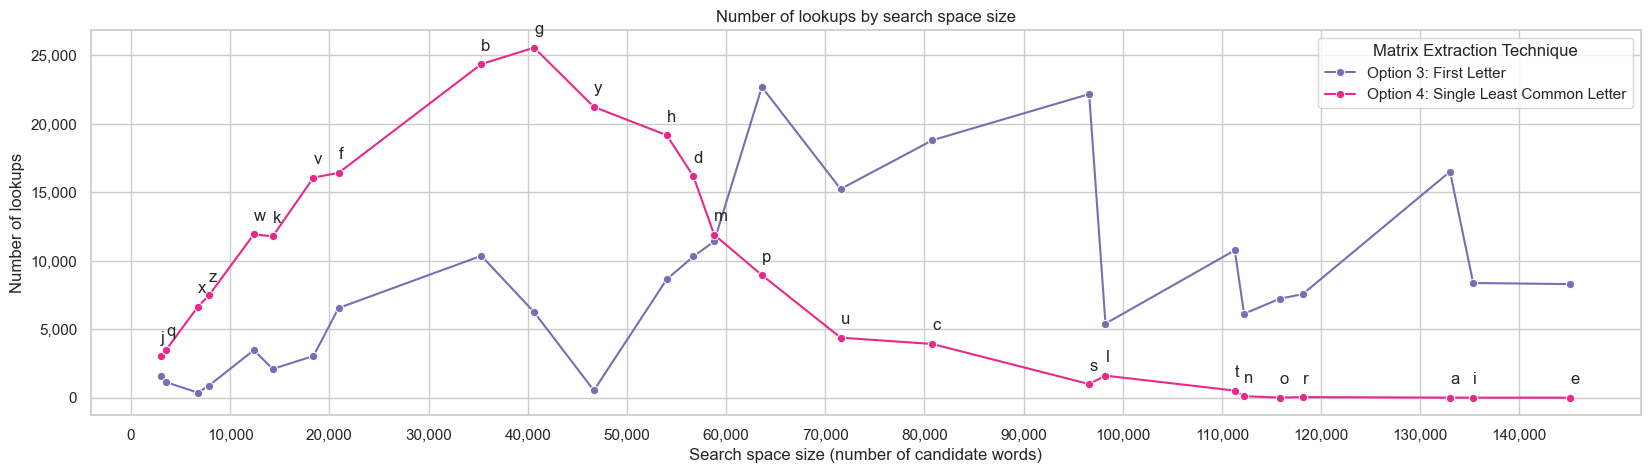

In [58]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

# define the color map
temp_color_map = {'Option 3: First Letter': meo_color_dict[3],
                  'Option 4: Single Least Common Letter': meo_color_dict[4]}

my_plot = sns.lineplot(data=lu_df_melt, x="word_count", y="number_of_lookups",
                          hue = "matrix_extraction", palette=temp_color_map,
                          linestyle='-', marker='o')

y_ticks = list(range(0, 25001, 5000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_ticks]   

x_ticks = list(range(0, 140001, 10000))
x_tick_labels_formatted = ['{:,}'.format(xtl) for xtl in x_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

plt.legend(title = 'Matrix Extraction Technique')

temp_lu_df_melt = lu_df_melt.loc[lu_df_melt['meo'] == 4, : ]

# label the points for option 4
for ir, row in temp_lu_df_melt.iterrows():
    plt.annotate(text = row['letter'],
                 xy = (row['word_count'], row['number_of_lookups'] + 1000))

plt.title(label = "Number of lookups by search space size")
plt.xlabel(xlabel = 'Search space size (number of candidate words)')
plt.ylabel(ylabel = "Number of lookups")
output_file_name = '..\\graphics\\meo_4_search_space_letter_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

# MATRIX EXTRACTION OPTION 4
## Average Percent Reduction Between First Letter Lookup and Single Letter Lookup

In [59]:
# compute the differences between the matrix extraction techniques

In [60]:
# build the letter selector
wg_df['letter_selector'] = wg_df['letter_group_ranked'].str[:3]

In [61]:
# the number of groups by letter selector length
pd.Series(wg_df['letter_selector'].unique()).str.len().value_counts()

3    2250
2     111
1      26
Name: count, dtype: int64

In [62]:
wg_df.head()

,word,lcase,n_chars,first_letter,word_id,word_group_id,letter_group,letter_group_ranked,word_group_count,letter_selector
0,A,a,1,a,0,0,a,a,1,a
1,aa,aa,2,a,1,1,a,a,1,a
2,aal,aal,3,a,2,2,al,la,2,la
3,aalii,aalii,5,a,3,3,ail,lai,1,lai
4,aam,aam,3,a,4,4,am,ma,2,ma


In [63]:
# join the word group dataframes
left_col_names = ['first_letter', 'n_chars', 'word_group_id', 'letter_selector']
right_col_names = ['word_group_id', 'first_letter_id', 'letter_selector_id', 
                   'me_03_first_letter_lookup', 'me_04_single_letter_lookup',
                   'me_05_letter_selector_lookup', 'me_06_nc_ls_lookup']
c_wg_df = pd.merge(left = wg_df[left_col_names],
                   right = wg_lu_df[right_col_names])

In [64]:
# aggregate by first letter and the counts of lookups
group_by_cols = ['first_letter', 'me_03_first_letter_lookup',
                 'me_04_single_letter_lookup', 'me_05_letter_selector_lookup',
                 'me_06_nc_ls_lookup']
wg_agg_df = c_wg_df[group_by_cols].groupby(by=group_by_cols[:-4]).agg(
    first_letter_lookup=('me_03_first_letter_lookup', 'sum'),
    single_letter_lookup=('me_04_single_letter_lookup', 'sum'),
    letter_selector_lookup=('me_05_letter_selector_lookup', 'sum'),
    nc_ls_lookup=('me_06_nc_ls_lookup', 'sum')).reset_index()

col_names = ['single_letter_lookup', 'letter_selector_lookup', 'nc_ls_lookup']
for cn in col_names:
    new_cn = cn + '_diff'
    wg_agg_df[new_cn] = ((wg_agg_df['first_letter_lookup'] -
                         wg_agg_df[cn]) / wg_agg_df['first_letter_lookup']) * 100

In [65]:
wg_agg_df.head(n=50)

,first_letter,first_letter_lookup,single_letter_lookup,letter_selector_lookup,nc_ls_lookup,single_letter_lookup_diff,letter_selector_lookup_diff,nc_ls_lookup_diff
0,a,2196245513,735961555,123072353,101884494,66.490014,94.396239,95.360970
1,b,366010797,293952235,26375678,22807798,19.687551,92.793743,93.768545
2,c,1519893288,836696574,119346318,96419559,44.950308,92.147717,93.656163
3,d,584968780,402583707,38770995,31106179,31.178599,93.372126,94.682421
4,e,1203944482,302954766,46057706,37627150,74.836484,96.174433,96.874677
5,f,137053471,125074736,10189493,8470207,8.740191,92.565316,93.819779
6,g,253971858,214788586,21847562,18683465,15.428194,91.397645,92.643490
7,h,467327020,345079158,37544895,28664567,26.158954,91.966034,93.866272
8,i,1133886898,352686462,55219599,40080260,68.895799,95.130061,96.465233
9,j,4712094,4712094,309814,271490,0.000000,93.425131,94.238443


In [66]:
wg_agg_df

,first_letter,first_letter_lookup,single_letter_lookup,letter_selector_lookup,nc_ls_lookup,single_letter_lookup_diff,letter_selector_lookup_diff,nc_ls_lookup_diff
0,a,2196245513,735961555,123072353,101884494,66.490014,94.396239,95.360970
1,b,366010797,293952235,26375678,22807798,19.687551,92.793743,93.768545
2,c,1519893288,836696574,119346318,96419559,44.950308,92.147717,93.656163
3,d,584968780,402583707,38770995,31106179,31.178599,93.372126,94.682421
4,e,1203944482,302954766,46057706,37627150,74.836484,96.174433,96.874677
5,f,137053471,125074736,10189493,8470207,8.740191,92.565316,93.819779
6,g,253971858,214788586,21847562,18683465,15.428194,91.397645,92.643490
7,h,467327020,345079158,37544895,28664567,26.158954,91.966034,93.866272
8,i,1133886898,352686462,55219599,40080260,68.895799,95.130061,96.465233
9,j,4712094,4712094,309814,271490,0.000000,93.425131,94.238443


<BarContainer object of 26 artists>
..\graphics\meo_4_letter_lookup_diff.png


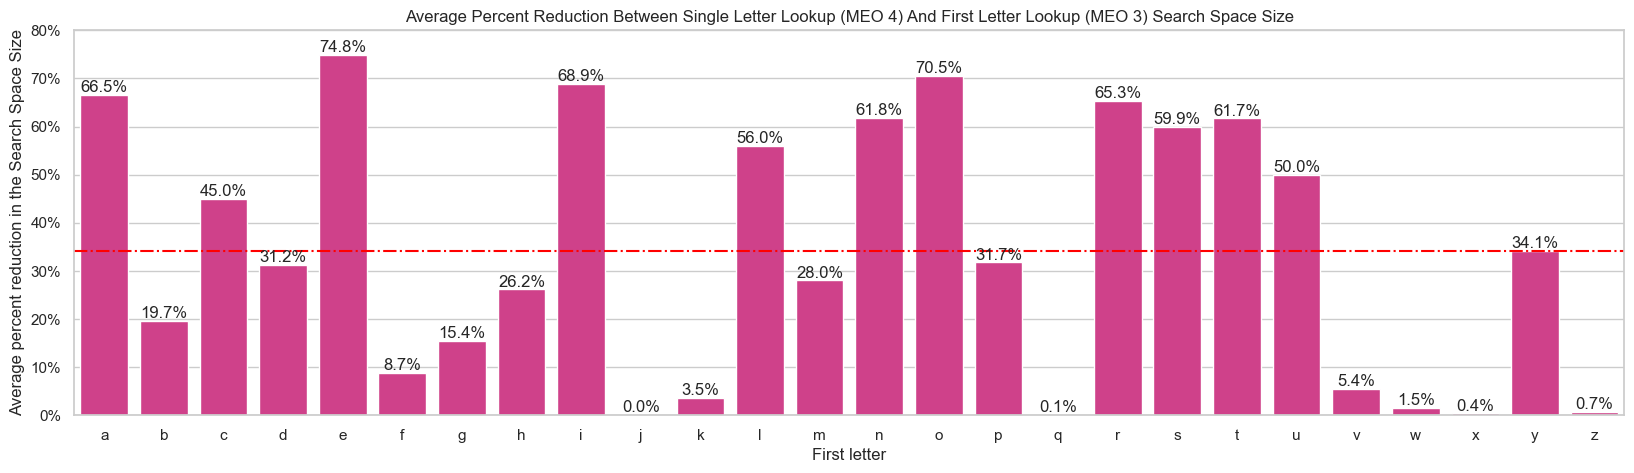

In [67]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="single_letter_lookup_diff",
                      color=meo_color_hex_dict[4])


y_ticks = list(range(0, 81, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

plt.axhline(y=wg_agg_df['single_letter_lookup_diff'].mean(), color='red', linestyle='dashdot')

# Annotate bars with values
bar_labels = [ f'{bl / 100 :.1%}' for bl in wg_agg_df['single_letter_lookup_diff']]

for c in ax.containers:
    print(c)
    ax.bar_label(c, labels = bar_labels)


#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction Between Single Letter Lookup (MEO 4) And First Letter Lookup (MEO 3) Search Space Size")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the Search Space Size")
output_file_name = '..\\graphics\\meo_4_letter_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

# MATRIX EXTRACTION OPTION 5

In [68]:
wg_df.loc[wg_df['lcase'] == 'achiever', 'word_group_id']

1329    1329
Name: word_group_id, dtype: int64

In [69]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [70]:
col_names = ['letter_selector_id', 'letter_selector', 'me_05_letter_selector_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [71]:
ls_df['ls_length'] = ls_df['letter_selector'].str.len()

In [72]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [73]:
ls_df.shape

(2387, 5)

In [74]:
ls_df['me_05_letter_selector_lookup'].describe()

count      2387.000000
mean       7444.399665
std       13775.994922
min           1.000000
25%         340.000000
50%        1665.000000
75%        8655.500000
max      145106.000000
Name: me_05_letter_selector_lookup, dtype: float64

In [75]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length
0,0,a,133001,2,1
1,1,ae,84952,1,2
2,2,ai,82414,1,2
3,3,b,35319,1,1
4,4,ba,23469,4,2


In [76]:
# compute the log to make visualization more accessible
ls_df['me_05_letter_selector_lookup_log'] = np.log10(ls_df['me_05_letter_selector_lookup'])

## Number of letter-selector groups by number of words per letter-selector group

..\graphics\meo_5_letter_selector_group_size.png


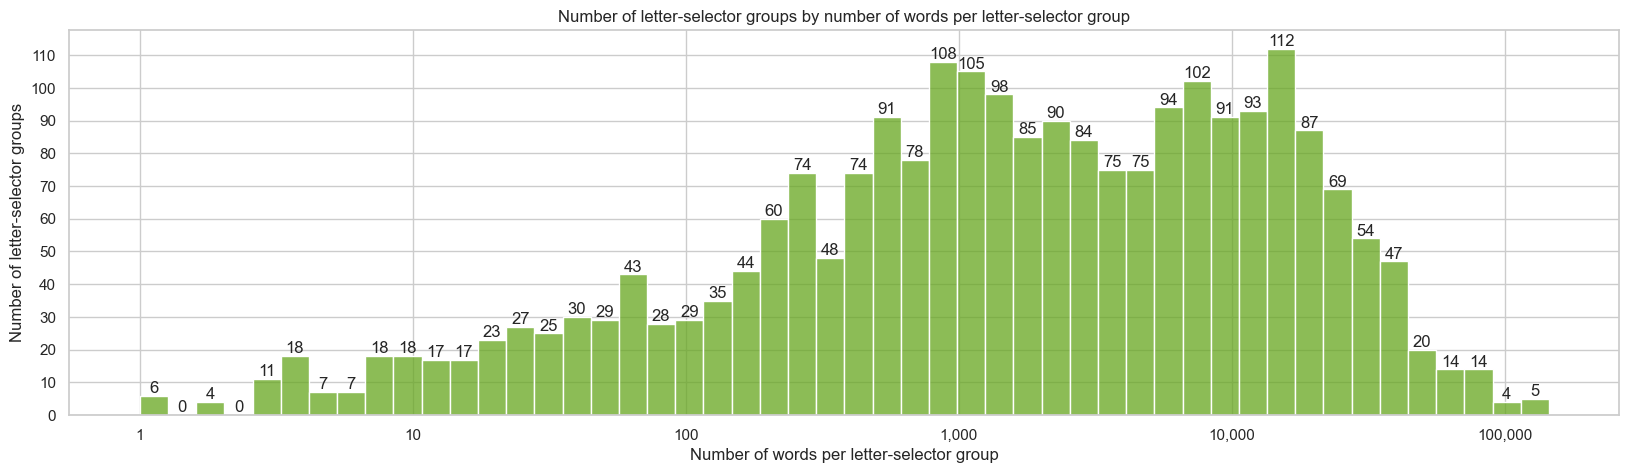

In [77]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                      color=meo_color_hex_dict[5], bins = 50)

y_tick_labels = list(range(0, 111, 10))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

# Annotate bars with values
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')


plt.title(label = "Number of letter-selector groups by number of words per letter-selector group")
plt.xlabel(xlabel = 'Number of words per letter-selector group')
plt.ylabel(ylabel = "Number of letter-selector groups")


output_file_name = '..\\graphics\\meo_5_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

In [78]:
ls_df.head()

,letter_selector_id,letter_selector,me_05_letter_selector_lookup,number_of_lookups,ls_length,me_05_letter_selector_lookup_log
0,0,a,133001,2,1,5.123855
1,1,ae,84952,1,2,4.929174
2,2,ai,82414,1,2,4.916001
3,3,b,35319,1,1,4.548008
4,4,ba,23469,4,2,4.370495


## Number of actual comparisons by the size of the letter selector group

..\graphics\meo_5_comparisons_by_letter_selector_group_size.png


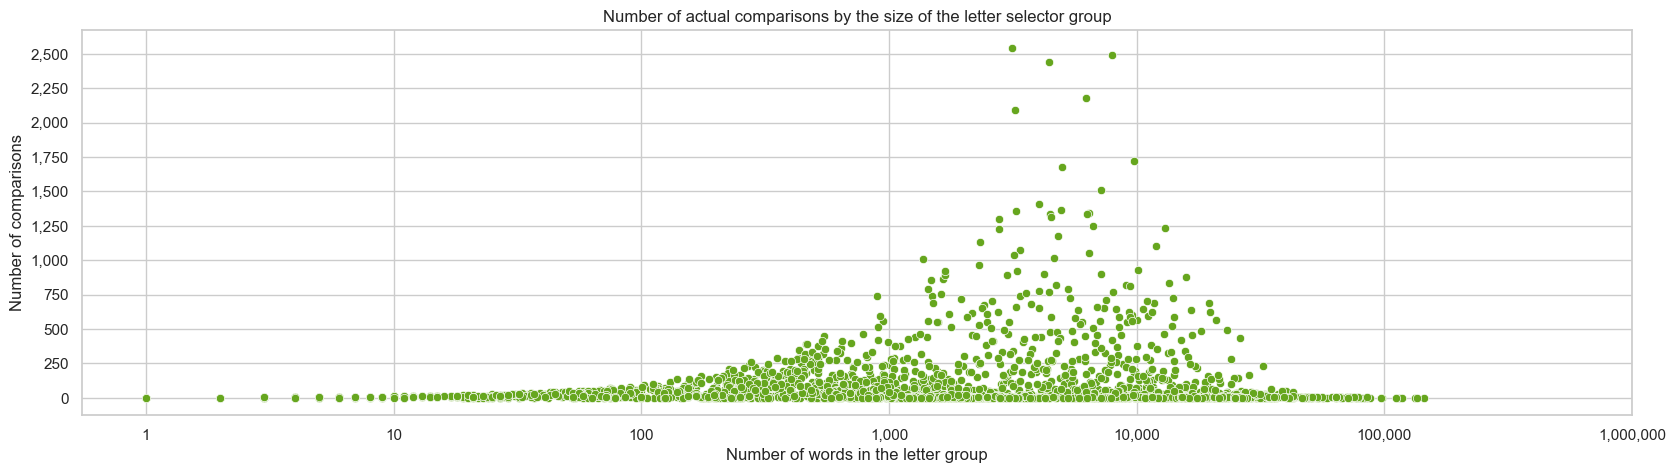

In [79]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

# scatter plot of number of candidates by the actual candidates
my_plot = sns.scatterplot(data = ls_df, x = 'me_05_letter_selector_lookup_log',
                y = 'number_of_lookups', color=meo_color_hex_dict[5])

y_tick_labels = list(range(0, 2501, 250))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = list(range(0,7))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)


plt.title(label = "Number of actual comparisons by the size of the letter selector group")
plt.xlabel(xlabel = 'Number of words in the letter group')
plt.ylabel(ylabel = "Number of comparisons")

output_file_name = '..\\graphics\\meo_5_comparisons_by_letter_selector_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

## Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and Letter Group Lookup

<BarContainer object of 26 artists>
..\graphics\meo_5_letter_selector_lookup_diff.png


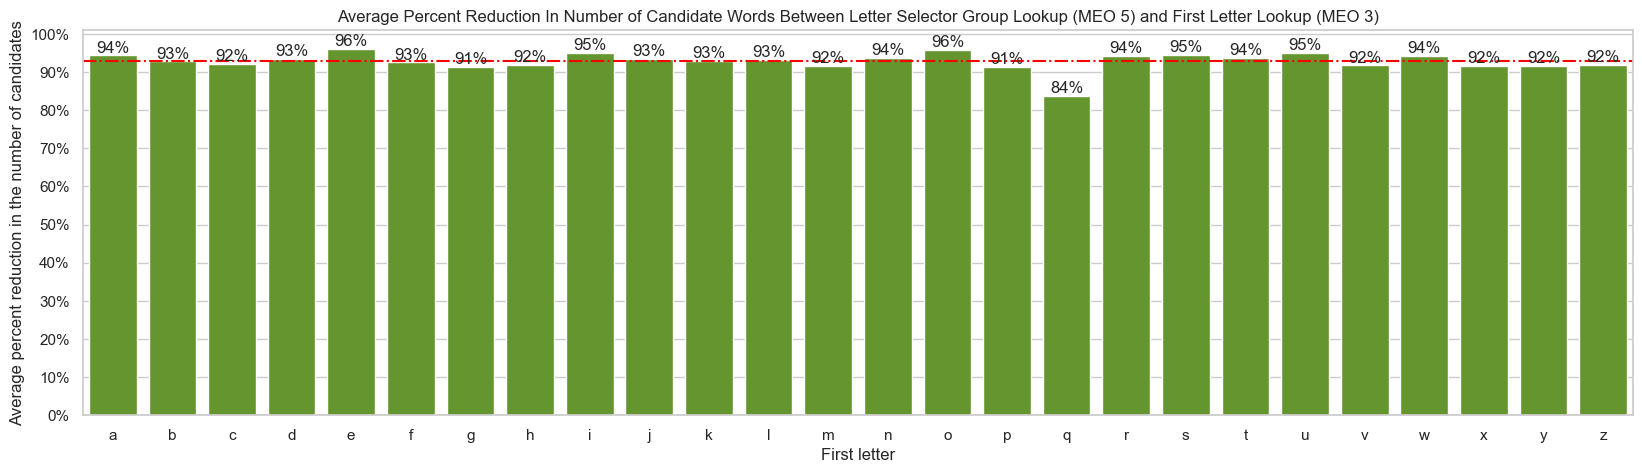

In [80]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="letter_selector_lookup_diff",
                      color=meo_color_hex_dict[5])

y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

# Add a horizontal line at y=20
plt.axhline(y=wg_agg_df['letter_selector_lookup_diff'].mean(), color='red', linestyle='dashdot')

# Annotate bars with values
bar_labels = [ f'{bl / 100 :.0%}' for bl in wg_agg_df['letter_selector_lookup_diff']]

for c in ax.containers:
    print(c)
    ax.bar_label(c, labels = bar_labels)

#ax.bar_label(ax.containers[0], fontsize=10)
plt.title(label = "Average Percent Reduction In Number of Candidate Words Between Letter Selector Group Lookup (MEO 5) and First Letter Lookup (MEO 3)")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\graphics\\meo_5_letter_selector_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



# MATRIX EXTRACTION OPTION 6

In [81]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [82]:
col_names = ['n_chars', 'letter_selector_id', 'letter_selector', 'me_06_nc_ls_lookup', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg( number_of_lookups = ('first_letter', 'size')).reset_index()

In [83]:
ls_df['me_06_nc_ls_lookup_log'] = np.log10(ls_df['me_06_nc_ls_lookup'])

In [84]:
ls_df['me_06_nc_ls_lookup'].describe()

count     16101.000000
mean       4491.670890
std        9154.747352
min           1.000000
25%         126.000000
50%         789.000000
75%        4552.000000
max      145106.000000
Name: me_06_nc_ls_lookup, dtype: float64

## Number of letter-selector-n-character groups by number of words per letter-selector-n-character group

<BarContainer object of 50 artists>
..\graphics\meo_6_nc_ls_group_size.png


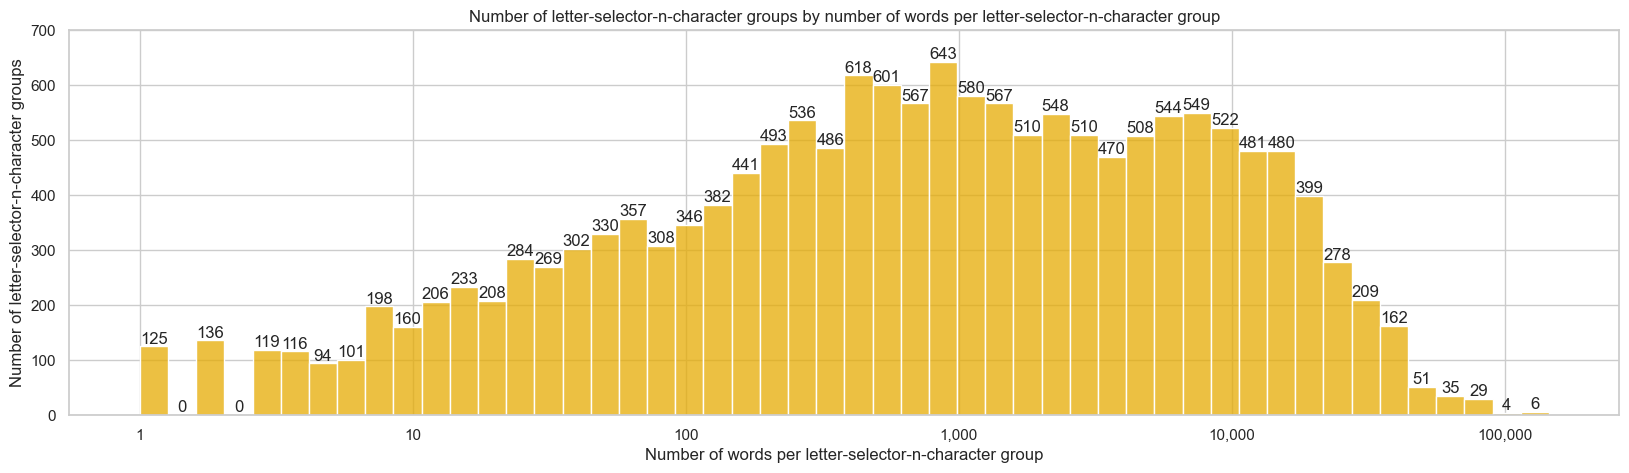

In [85]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.histplot(data = ls_df, x = 'me_06_nc_ls_lookup_log',
                      color=meo_color_hex_dict[6], bins = 50)

y_ticks = list(range(0, 701, 100))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

# Annotate bars with values

for c in ax.containers:
    print(c)
    ax.bar_label(c)

plt.title(label = "Number of letter-selector-n-character groups by number of words per letter-selector-n-character group")
plt.xlabel(xlabel = 'Number of words per letter-selector-n-character group')
plt.ylabel(ylabel = "Number of letter-selector-n-character groups")

x_ticks = list(range(0,6))
x_tick_labels_formatted = ['{:,}'.format(10**xtl) for xtl in x_ticks]   

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels_formatted, rotation=0)

output_file_name = '..\\graphics\\meo_6_nc_ls_group_size.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)

## Average Percent Reduction In Number of Candidate Words Between First Letter Lookup and the Combined Number Of Characters and Letter Group Lookup

94.16383449016666
<BarContainer object of 26 artists>
..\graphics\meo_6_nc_ls_lookup_diff.png


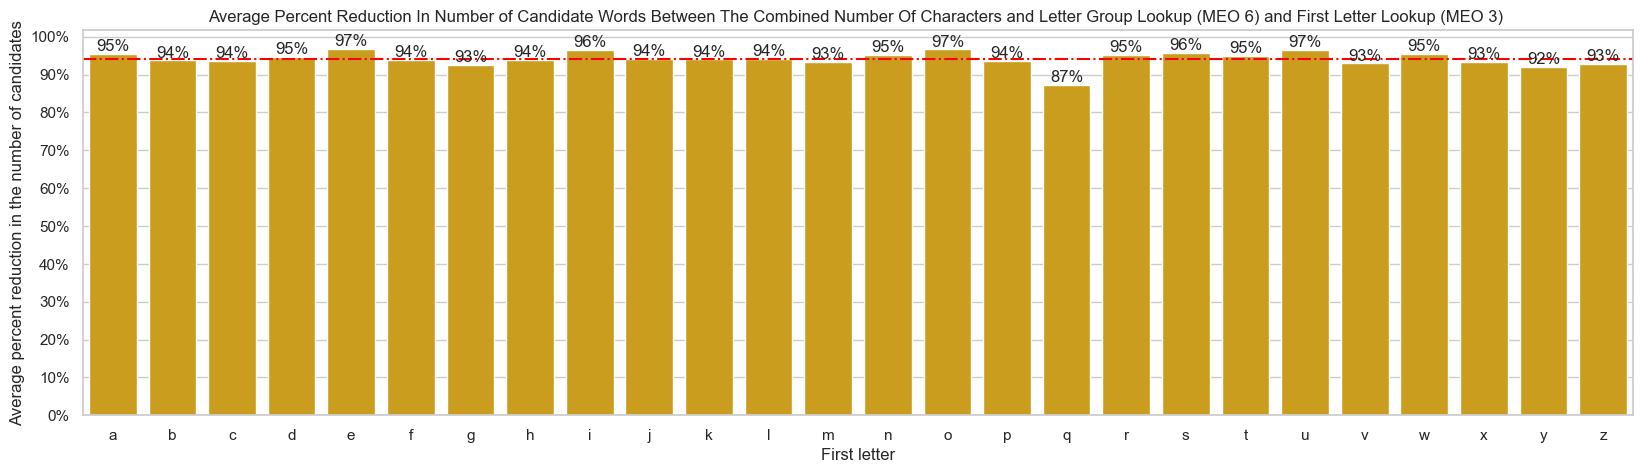

In [86]:
sns.set_theme(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 5))

my_plot = sns.barplot(data=wg_agg_df, x="first_letter", y="nc_ls_lookup_diff",
                      color=meo_color_hex_dict[6])
#ax.bar_label(ax.containers[0], fontsize=10)


y_ticks = list(range(0, 101, 10))
y_tick_labels_formatted = ['{:.0%}'.format(ytl/100) for ytl in y_ticks]   

my_plot.set_yticks(ticks = y_ticks)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

# Add a horizontal line at y=20
mean_value = wg_agg_df['nc_ls_lookup_diff'].mean()
print(mean_value)
plt.axhline(y=mean_value, color='red', linestyle='dashdot')

# Annotate bars with values
bar_labels = [ f'{bl / 100 :.0%}' for bl in wg_agg_df['nc_ls_lookup_diff']]

for c in ax.containers:
    print(c)
    ax.bar_label(c, labels = bar_labels)


plt.title(label = "Average Percent Reduction In Number of Candidate Words Between The Combined Number Of Characters and Letter Group Lookup (MEO 6) and First Letter Lookup (MEO 3) ")
plt.xlabel(xlabel = 'First letter')
plt.ylabel(ylabel = "Average percent reduction in the number of candidates")
output_file_name = '..\\graphics\\meo_6_nc_ls_lookup_diff.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)



In [87]:
wg_agg_df.head()

,first_letter,first_letter_lookup,single_letter_lookup,letter_selector_lookup,nc_ls_lookup,single_letter_lookup_diff,letter_selector_lookup_diff,nc_ls_lookup_diff
0,a,2196245513,735961555,123072353,101884494,66.490014,94.396239,95.360970
1,b,366010797,293952235,26375678,22807798,19.687551,92.793743,93.768545
2,c,1519893288,836696574,119346318,96419559,44.950308,92.147717,93.656163
3,d,584968780,402583707,38770995,31106179,31.178599,93.372126,94.682421
4,e,1203944482,302954766,46057706,37627150,74.836484,96.174433,96.874677


In [88]:
c_wg_df.head()

,first_letter,n_chars,word_group_id,letter_selector,first_letter_id,letter_selector_id,me_03_first_letter_lookup,me_04_single_letter_lookup,me_05_letter_selector_lookup,me_06_nc_ls_lookup
0,a,1,0,a,0,0,133001,133001,133001,133001
1,a,2,1,a,0,0,133001,133001,133001,133000
2,a,3,2,la,0,1081,133001,98258,65528,65527
3,a,5,3,lai,0,1083,133001,98258,42754,42731
4,a,3,4,ma,0,1114,133001,58800,38652,38651


In [89]:
c_wg_df.shape

(215842, 10)

In [90]:
col_names = ['letter_selector', 'first_letter_id', 
              'letter_selector_id', 'first_letter']
#ls_df = c_wg_df[col_names].drop_duplicates()
ls_df = c_wg_df[col_names].groupby(col_names[:-1]).agg(
     number_of_lookups = ('first_letter', 'size')).reset_index()

In [91]:
ls_df.shape

(13009, 4)

# CONCLUSION: INDIVIDUAL TIMING

In [92]:
sql = 'select * from matrix_extraction_timing;'
met_df = query_db(sql = sql, db_path = rc.DB_PATH,
              db_name = rc.DB_NAME)

...query execution took: 0.0 seconds...


In [93]:
met_df = met_df.set_index(keys = 'Matrix Extraction')

In [94]:
met_df.head()

,Option 1,Option 2,Option 3,Option 4,Option 5,Option 6
Matrix Extraction,,,,,,
Option 1,1.000000,1.180461,1.560107,10.820213,154.027308,154.425941
Option 2,0.847127,1.000000,1.321608,9.166089,130.480617,130.818310
Option 3,0.640982,0.756654,1.000000,6.935560,98.728708,98.984225
Option 4,0.092420,0.109098,0.144184,1.000000,14.235146,14.271987
Option 5,0.006492,0.007664,0.010129,0.070249,1.000000,1.002588


## Ratio of matrix extraction times for the word 'achiever

..\graphics\meo_all_comp_times.png


<Figure size 1920x1440 with 0 Axes>

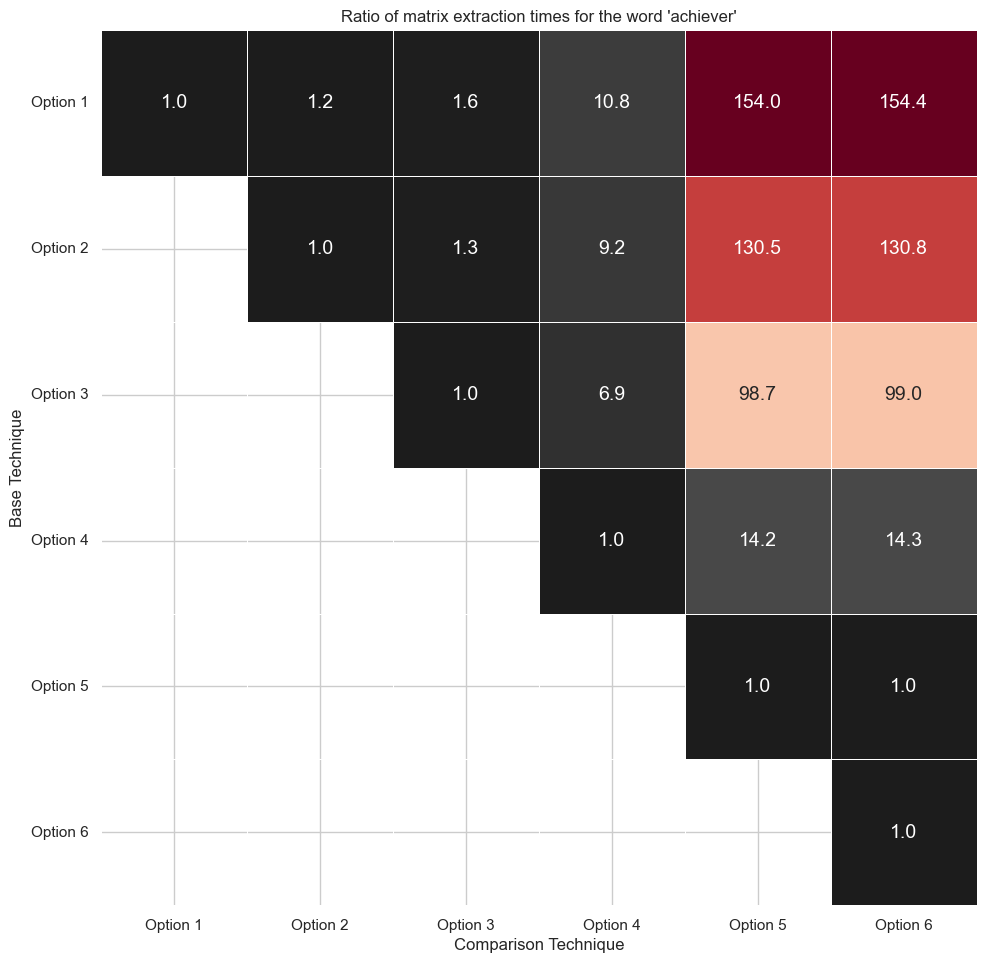

In [95]:
# make another heatmap
im_data = met_df.to_numpy()
im_data_mask = im_data < 1

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for the word 'achiever'")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\graphics\\meo_all_comp_times.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

## Overall issues of timing

In [ ]:
# load several tables from sqlite to aid with visualization
df_list = []
base_sql = 'select * from words_me_{}'
for tn in range(1, 7):
    sql = base_sql.format(str(tn).zfill(2))
    print(sql)
    df = query_db(sql = sql, db_path = rc.DB_PATH, db_name = rc.DB_NAME)
    df_list.append(df)


In [ ]:
t_df = pd.concat(df_list)

In [ ]:
t_df.shape

In [ ]:
# let's aggregate by technique
t_df_agg = t_df[['matrix_extraction_option', 'n_seconds']].groupby(['matrix_extraction_option']).agg(tot_seconds = ('n_seconds', 'sum')).reset_index()

In [ ]:
t_df_agg['n_minutes'] = t_df_agg['tot_seconds'] / 60
t_df_agg['n_hours'] = t_df_agg['n_minutes'] / 60

In [ ]:
t_df_agg.head(10)

In [ ]:
# let's convert to total hours, total minutes, and total seconds
def get_hms(seconds:float, round_seconds_digits:int = 0, as_string:bool = True):
    # convert seconds to total hours, minutes, and seconds
    # for example: 3663 seconds is 1 hour, 1 minute, 1 second
    # whole hours
    hours = int(seconds // 3600)
    minutes = int((seconds - (hours * 3600)) // 60)
    remaining_seconds = seconds - ((hours * 3600) + (minutes * 60))
    
    remaining_seconds = round(remaining_seconds, round_seconds_digits)
    if round_seconds_digits == 0:
        remaining_seconds = int(remaining_seconds)
    
    if as_string:
        hours = str(hours)
        minutes = str(minutes)
        remaining_seconds = str(remaining_seconds)

    return hours, minutes, remaining_seconds
    

In [ ]:
# format the numbers for a markdown table
for ir, my_row in t_df_agg.iterrows():    
    meo = my_row['matrix_extraction_option']
    meo = int(meo)

    my_line = f'|{meo}|{'|'.join(get_hms(my_row['tot_seconds']))}|'

    print(my_line)



In [ ]:
expanded_timing_list = []
for me_source, me_target in product(t_df_agg.values.tolist(), repeat=2):    
    #print(me_source, me_target)
    # let's unpack this
    me_source_option, me_source_timing = me_source[:2]
    me_target_option, me_target_timing = me_target[:2]

    me_source_option = 'Option ' + str(int(me_source_option))
    me_target_option =  'Option ' + str(int(me_target_option))
    
    me_source_target_timing_ratio = me_source_timing / me_target_timing
    
    # add to the list
    expanded_timing_list.append([me_source_option, me_target_option, me_source_timing, me_target_timing, me_source_target_timing_ratio])    

In [ ]:
col_names = ['source', 'target', 'source_timing', 'target_timing', 'timing_ratio']
ex_t_df = pd.DataFrame(data= expanded_timing_list, columns=col_names)

In [ ]:
ex_t_df.head()

In [ ]:
timing_table = ex_t_df.pivot_table(index = ['source'], columns = ['target'],
                           values =['timing_ratio']).reset_index(drop = False, names = 'Matrix Extraction')

In [ ]:
timing_table.columns

In [ ]:
# use a list comprehension to clean up the column names
col_names = [''.join(cn).replace('timing_ratio', '') for cn in timing_table.columns.tolist()]

In [ ]:
timing_table.columns = col_names

In [ ]:
timing_table = timing_table.set_index('Matrix Extraction')

In [ ]:

timing_table.head(n=10)

In [ ]:
# make another heatmap
im_data = timing_table.to_numpy()
im_data_mask = im_data < .7

sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (10, 10))

norm = plt.Normalize(im_data.min(), im_data.max())

my_plot = sns.heatmap(data = im_data, cmap = 'RdGy_r', norm = norm,
            square = True, linewidths=.5, cbar = False,
            annot=True, fmt='.1f',
            annot_kws={"size": 14},
            mask = im_data_mask)            

my_plot.set_yticklabels(labels = met_df.columns, rotation=0)
my_plot.set_xticklabels(labels = met_df.columns, rotation=0)
plt.title(label = "Ratio of matrix extraction times for all words")
plt.xlabel(xlabel = 'Comparison Technique')
plt.ylabel(ylabel = "Base Technique")
output_file_name = '..\\graphics\\meo_all_comp_times_all_words.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()

In [ ]:
# graphics to make:
# total time for all words
# average search space counts and ratios

In [ ]:
value_cols = ['me_01_full_matrix_lookup',
           'me_02_n_char_lookup',
           'me_03_first_letter_lookup',
           'me_04_single_letter_lookup',
           'me_05_letter_selector_lookup',
           'me_06_nc_ls_lookup']

wg_lu_melt = wg_lu_df.melt(id_vars = ['word_group_id'],value_vars = value_cols,
                           var_name = 'matrix_extraction',
                           value_name='candidate words')

In [ ]:
wg_lu_melt['matrix_extraction'] = wg_lu_melt['matrix_extraction'].str[3:5]

In [ ]:
# before we can make a box plot, we need to melt the dataframe
#testo = wg_lu_melt.loc[wg_lu_melt['matrix_extraction'] != '01', :]

In [ ]:
sns.set_theme(style = "whitegrid")
plt.figure(dpi = 300)

f, ax = plt.subplots(figsize = (20, 10))
my_plot = sns.boxplot(data = wg_lu_melt, x = 'matrix_extraction', hue = 'matrix_extraction',
                      y = 'candidate words', linewidth = 2,
                      fliersize=2, palette = 'Dark2')

y_tick_labels = list(range(0, 220001, 10000))
y_tick_labels_formatted = ['{:,}'.format(ytl) for ytl in y_tick_labels]   

my_plot.set_yticks(ticks = y_tick_labels)
my_plot.set_yticklabels(labels = y_tick_labels_formatted, rotation=0)

x_ticks = range(0, wg_lu_melt['matrix_extraction'].unique().shape[0])
x_tick_labels = ['Option ' + str(ii) for ii in range(1, 7)]

my_plot.set_xticks(ticks = x_ticks)
my_plot.set_xticklabels(labels = x_tick_labels, rotation=0)
plt.title(label = "Search space distribution by matrix extraction technique")
plt.xlabel(xlabel = 'Matrix extraction technique')
plt.ylabel(ylabel = 'Number of candidate words in the search space')
output_file_name = '..\\graphics\\meo_all_box_plot_distribution.png'
output_file_name = os.path.normpath(output_file_name)
print(output_file_name)
my_plot.get_figure().savefig(fname = output_file_name)
plt.tight_layout()
plt.show()
